In [165]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt


In [3]:
df_analysis = pd.read_csv('data\dataset_wout_surf_encoded.csv')
df_analysis.dtypes

bedroomCount                     float64
bathroomCount                    float64
habitableSurface                 float64
toiletCount                      float64
postCode                           int64
totalParkingCount                float64
province_encoded                   int64
type_encoded                       int64
subtype_encoded                    int64
locality_encoded                 float64
epcScore_encoded                 float64
hasAttic_encoded                   int64
hasGarden_encoded                  int64
hasAirConditioning_encoded         int64
hasArmoredDoor_encoded             int64
hasVisiophone_encoded              int64
hasTerrace_encoded                 int64
hasOffice_encoded                  int64
hasSwimmingPool_encoded            int64
hasFireplace_encoded               int64
hasBasement_encoded                int64
hasDressingRoom_encoded            int64
hasDiningRoom_encoded              int64
hasLift_encoded                    int64
hasHeatPump_enco

#### Transforming categorical variables

In [4]:
boolean_cols = df_analysis.columns[df_analysis.columns.str.startswith('has')]
print(boolean_cols)

Index(['hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')


In [5]:
df_int_cols = df_analysis.select_dtypes(include='int64').columns
encoded_categories = list(set(df_int_cols) - set(boolean_cols))
encoded_categories.append('locality_encoded')
encoded_categories

['subtype_encoded',
 'province_encoded',
 'postCode',
 'type_encoded',
 'locality_encoded']

In [6]:
for col in encoded_categories:
    df_analysis[col]= df_analysis[col].astype("category")

In [7]:
df_analysis.dtypes

bedroomCount                      float64
bathroomCount                     float64
habitableSurface                  float64
toiletCount                       float64
postCode                         category
totalParkingCount                 float64
province_encoded                 category
type_encoded                     category
subtype_encoded                  category
locality_encoded                 category
epcScore_encoded                  float64
hasAttic_encoded                    int64
hasGarden_encoded                   int64
hasAirConditioning_encoded          int64
hasArmoredDoor_encoded              int64
hasVisiophone_encoded               int64
hasTerrace_encoded                  int64
hasOffice_encoded                   int64
hasSwimmingPool_encoded             int64
hasFireplace_encoded                int64
hasBasement_encoded                 int64
hasDressingRoom_encoded             int64
hasDiningRoom_encoded               int64
hasLift_encoded                   

### Linnear Regression

#### Creating the variables

In [34]:
df_analysis.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'postCode', 'totalParkingCount', 'province_encoded', 'type_encoded',
       'subtype_encoded', 'locality_encoded', 'epcScore_encoded',
       'hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded', 'price'],
      dtype='object')

In [84]:
y = df_analysis['price']


In [ ]:
X_optimal= df_analysis[
    ['bedroomCount', 
    'bathroomCount',
    'habitableSurface', 
    'toiletCount', 

    'hasOffice_encoded', 
    'hasPhotovoltaicPanels_encoded', 
    'hasHeatPump_encoded', 
    'hasTerrace_encoded',

    'province_encoded',
    'postCode',
    
    'type_encoded',
    'subtype_encoded']
    ]


(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [149]:
X_complete = df_analysis.drop(columns=['price', 'locality_encoded'])


In [150]:
#X= X_optimal
X = X_complete
X.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'postCode', 'totalParkingCount', 'province_encoded', 'type_encoded',
       'subtype_encoded', 'epcScore_encoded', 'hasAttic_encoded',
       'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')

In [151]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded 

,bedroomCount,bathroomCount,habitableSurface,toiletCount,totalParkingCount,epcScore_encoded,hasAttic_encoded,hasGarden_encoded,hasAirConditioning_encoded,hasArmoredDoor_encoded,...,subtype_encoded_15,subtype_encoded_16,subtype_encoded_17,subtype_encoded_18,subtype_encoded_19,subtype_encoded_20,subtype_encoded_21,subtype_encoded_22,subtype_encoded_23,subtype_encoded_24
0,2.0,1.0,100.0,1.0,1.0,5.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2.0,1.0,87.0,1.0,0.0,2.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2.0,2.0,104.0,2.0,0.0,6.0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1.0,1.0,71.0,1.0,0.0,3.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,90.0,1.0,0.0,4.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70195,4.0,2.0,242.0,2.0,3.0,5.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
70196,3.0,1.0,94.0,1.0,0.0,4.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
70197,3.0,1.0,113.0,1.0,0.0,6.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
70198,3.0,2.0,111.0,2.0,0.0,7.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


#### Linear Regression

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.8, random_state=42)

In [153]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [154]:

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolure Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)



Mean Squared Error: 10481309681.469625
Mean Absolure Error: 75114.33973106448
R² Score: 0.605552189975073
Intercept: 148072.76096095826


#### Visualizing Results

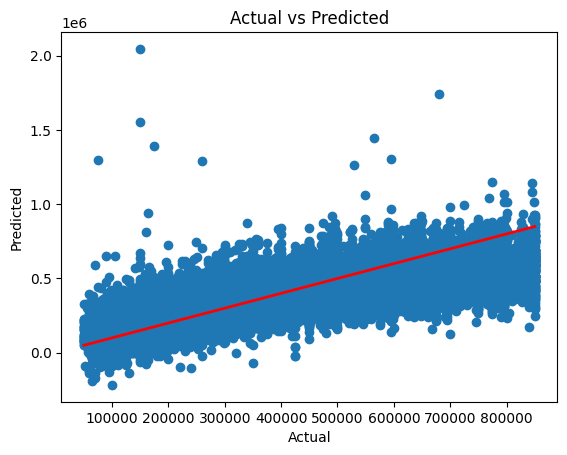

In [168]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

##### Residuals Plot

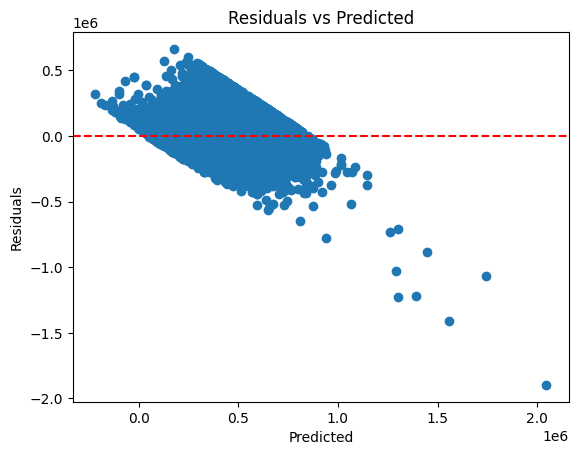

In [162]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

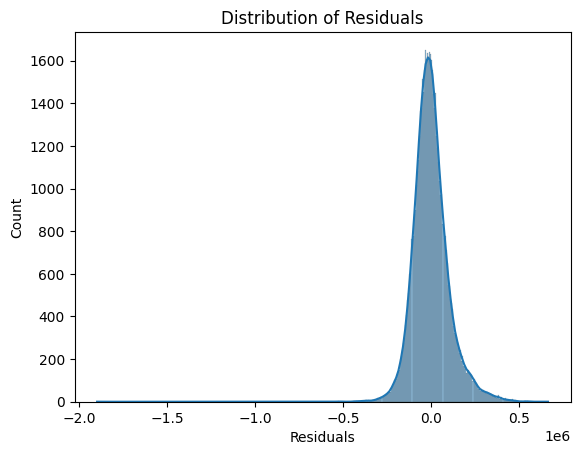

In [163]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [ ]:
### Residuals are seen to have a skewed distribution:
##### Residuals are positive at low predicted values

##### Residuals are negative at high predicted values